## Lab 7.a

Brief diversion, solutions to **Assignment 1** and **Quiz 1**.

### The remainder of this lab will be a sequence of introductory Sympy exercises

**Exercise 1**: In class we saw the equality expression "==" in Sympy sometimes gives *false negatives*, i.e. it might say two expressions are not equal, when they are. 

Find a way to use Sympy's [**simplify**](https://docs.sympy.org/latest/tutorial/simplification.html) command to verify the two expressions

$$\frac{1}{\sqrt{2}-1} \text{ and } \sqrt{2} + 1$$

are equal.

In [1]:
import sympy as sp

In [9]:
one = 1/(sp.sqrt(2)-1)
two = sp.sqrt(2)+1
one_simp=sp.simplify(one)
sp.pprint(one_simp)
sp.pprint(two)
print("Are they equal in the eyes of sympy?")
if one_simp-two==0:
    print("Yes! They are equal")
## equal ##

1 + √2
1 + √2
Are they equal in the eyes of sympy?
Yes! They are equal


**Exercise 2**: Write a function $f(n)$ that returns a Sympy polynomial that is the degree $2n$ Taylor expansion of the $\cos x$ function.

$$T^{2n}(x) = 1 - \frac{1}{2!}x^2 + \frac{1}{4!}x^4 + \cdots + (-1)^n\frac{1}{(2n)!}x^{2n}$$

Print out these polynomials for $n=1,2,3,4,5$ and use Sympy to compute the
derivative of these polynomials.


In [12]:
x=sp.Symbol('x')
li=[]
n=10
for n in range(0,n+1):
    li.append(((-1)**n/sp.factorial(2*n))*(x**(2*n)))
sp.pprint(sum(li))

         20                  18                16              14           12
        x                   x                 x               x            x  
─────────────────── - ──────────────── + ────────────── - ─────────── + ──────
2432902008176640000   6402373705728000   20922789888000   87178291200   479001

         10        8      6    4    2    
        x         x      x    x    x     
─── - ─────── + ───── - ─── + ── - ── + 1
600   3628800   40320   720   24   2     


**Exercise 3**: Compute the composite of the Taylor polynomial from Ex.2 with the function $x^2$, i.e. $T^{2n}(x^2)$ for $n=1,2,3,4,5$.

From Calculus, this is a Taylor polynomial (of the appropriate order) for the function $\cos(x^2)$.

Use Sympy to compute the integrals:
$$\int_0^x \cos(x^2) dx$$ 
$$\int_0^x T^{2n}(x^2) dx \text{  for  } n=1,2,3,4,5.$$

**Advice**: You can replace a variable with another in a Sympy expression with the [subs](https://docs.sympy.org/latest/tutorial/basic_operations.html) (substitute) command.

Put the plots of these functions in one common matplotlib plot, so that they can be compared.  Make the domain of the plot $x = [-2\pi,2\pi]$. 

**Advice**: You might find that due to the polynomials being extremely large towards the ends of the integration, it will help to set the **y-limits** of your plot to reasonable numbers such as $-2.0$ and $2.0$. Otherwise your plot's y-scale could be so large that it distorts the most interesting features of your functions.  Look up the [ylim](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html) command for *pyplot*.


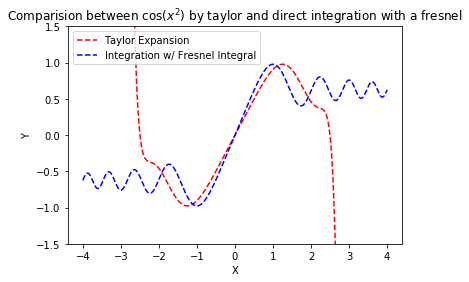

In [19]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi as pi
x=sp.Symbol('x')
li=[]
for n in range(1,6):
    li.append(((-1)**n/sp.factorial(2*n))*(x**(2*n)))
tay=1+sum(li)
Tay=sp.integrate((tay.subs(x,x**2)))
Co=sp.integrate(sp.cos(x**2))
# sp.pprint(Tay)
# sp.pprint(Co)
Tay=sp.lambdify(x,Tay)
Co=sp.lambdify(x,Co)
# sp.fresnelx(dom)
dom=np.linspace(-4,4,1000)
C=(sp.sqrt(2)*sp.sqrt(pi)*sp.gamma(1/4)/(8*sp.gamma(5/4))).evalf()
Co=C*np.array([sp.fresnelc(x).evalf() for x in dom])
plt.ylim(-1.5,1.5)

## Plot markings ##

plt.title('Comparision between $\cos(x^2)$ by taylor and direct integration with a fresnel')
plt.xlabel("X")
plt.ylabel("Y")

## Plot data ##

plt.plot(dom,Tay(dom),'r--',label="Taylor Expansion")
plt.plot(dom,Co,'b--',label="Integration w/ Fresnel Integral")
plt.legend()

plt.show()
